In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv("glassdoor_ds_jobs_clean.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Company,State,Age of Company,python_ind,excel_ind,rstudio_ind,aws_ind,spark_ind,sql_ind,Requirements
0,Data Scientist,Employer Provided Salary:$140K - $220K,"Data science dream job:\r\nSit in meetings, cl...",0.0,Prolego,Georgia,Unknown,0,Unknown,Unknown,...,Prolego,Unknown,Unknown,0,0,0,0,0,0,No requirement specified
1,Data Scientist,Employer Provided Salary:$70K - $90K,"Data Scientist\r\nQuaEra, a rapidly growing NY...",0.0,Aignyte,Remote,Unknown,0,Unknown,Unknown,...,Aignyte,Remote,Unknown,0,0,0,0,0,0,No requirement specified
2,Data Scientist II,Employer Provided Salary:$119K - $160K,"Education in Data Science, Statistics, Economi...",3.7,Amazon.com Services LLC\r\n3.7,Remote,10000+ Employees,1994,Company - Public,Internet,...,Amazon.com Services LLC\r\n,Remote,27,0,0,0,0,0,0,No requirement specified
3,Data Scientist - 100% Remote,Employer Provided Salary:$125K - $180K,Data Scientist:\r\n2 full time personnel neede...,0.0,i3its llc,Remote,Unknown,0,Unknown,Unknown,...,i3its llc,Remote,Unknown,0,0,0,0,0,0,No requirement specified
4,Data Scientist,Employer Provided Salary:$78K - $181K,Title\r\nData Scientist\r\nReports to\r\nPrima...,4.1,SOUTHERN NEW HAMPSHIRE UNIVERSITY\r\n4.1,Remote,10000+ Employees,1932,College / University,Colleges & Universities,...,SOUTHERN NEW HAMPSHIRE UNIVERSITY\r\n,Remote,89,0,0,0,0,0,0,No requirement specified


In [40]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Is Hourly', 'Have Employer Provided',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Company', 'State',
       'Age of Company', 'python_ind', 'excel_ind', 'rstudio_ind', 'aws_ind',
       'spark_ind', 'sql_ind', 'Requirements'],
      dtype='object')

In [41]:
#function to simplify the job title
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'Data Scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'analyst' in title.lower():
        return 'Analyst'
    elif 'machine learning' in title.lower():
        return 'Machine Learning'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'director' in title.lower():
        return 'Director'
    else:
        return 'Others'

In [42]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'Junior'
    else:
        return 'NA'

In [43]:
df["Job Simp."] = df['Job Title'].apply(title_simplifier)
df["Job Simp."].value_counts()

Data Scientist    494
Others              3
Name: Job Simp., dtype: int64

In [44]:
df[df["Job Simp."] == "Others"]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,State,Age of Company,python_ind,excel_ind,rstudio_ind,aws_ind,spark_ind,sql_ind,Requirements,Job Simp.
91,Mathematical Scientist,$50K - $70K (Employer est.),Pit.AI Technologies is taking on one of the mo...,0.0,Pit.AI Technologies Inc.,"San Jose, CA",1 to 50 Employees,0,Company - Private,Unknown,...,CA,Unknown,0,1,0,0,0,0,Excel,Others
146,Data Architect/Scientist,$100K - $218K (Employer est.),adroitts is is seeking Data Architect/Scientis...,0.0,adroitts,Remote,1 to 50 Employees,0,Company - Private,Unknown,...,Remote,Unknown,0,0,0,0,0,0,No requirement specified,Others
176,Data Entry/Scientist,$73K - $143K (Glassdoor est.),Job Overview:\r\nPerform data entry activities...,0.0,CB&I,"Boca Raton, FL",10000+ Employees,1889,Company - Private,Energy,...,FL,132,0,0,0,0,0,0,No requirement specified,Others


In [45]:
df["Seniority"] = df['Job Title'].apply(seniority)
df["Seniority"].value_counts()

NA        469
Senior     25
Junior      3
Name: Seniority, dtype: int64

In [46]:
df.State.value_counts()

Remote     196
Unknown     52
NY          40
WA          26
CA          26
IA          24
MI          23
CO          20
DC          17
MA          13
TX          12
ND          11
VA           5
GA           5
NC           4
IL           3
UT           3
NJ           2
MD           2
MO           2
FL           2
TN           1
MT           1
PA           1
AL           1
VT           1
NE           1
MN           1
DE           1
IN           1
Name: State, dtype: int64

In [47]:
# job desc length
df["Desc. Length"] = df["Job Description"].apply(lambda x: len(x))
df["Desc. Length"]

0       364
1      1159
2      3948
3       344
4       189
       ... 
492    1058
493     146
494     779
495     681
496     534
Name: Desc. Length, Length: 497, dtype: int64

In [48]:
df.rename(columns = {"Is Hourly": "Hourly"}, inplace = True)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Have Employer Provided',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Company', 'State',
       'Age of Company', 'python_ind', 'excel_ind', 'rstudio_ind', 'aws_ind',
       'spark_ind', 'sql_ind', 'Requirements', 'Job Simp.', 'Seniority',
       'Desc. Length'],
      dtype='object')

In [49]:
#hourly salary convert to annual salary
#In case you are confused with multiplying the hourly rate by 2, here what it happens under the hood: 
#2000 = 8hrs/day * 5 days/week * 50 weeks.  
#The year has 52 weeks but 2 of those weeks are assigned to holidays and vacation time.
df["Min Salary"] = df.apply(lambda x: x["Min Salary"]*2 if x.Hourly == 1 else x["Min Salary"], axis = 1)
df["Max Salary"] = df.apply(lambda x: x["Max Salary"]*2 if x.Hourly == 1 else x["Max Salary"], axis = 1)

In [50]:
df[df.Hourly == 1][["Hourly","Min Salary","Max Salary"]]

,Hourly,Min Salary,Max Salary
17,1,62,158
27,1,100,110
28,1,100,110
29,1,100,110
30,1,100,110
31,1,100,110
32,1,100,110
33,1,100,110
34,1,100,110
35,1,100,110


In [52]:
df["Company"] = df["Company"].apply(lambda x: x.strip())
df["Company"]

0                                Prolego
1                                Aignyte
2                Amazon.com Services LLC
3                              i3its llc
4      SOUTHERN NEW HAMPSHIRE UNIVERSITY
                     ...                
492                                 Yelp
493                            Starbucks
494                           BlueVoyant
495                           John Deere
496                              workcog
Name: Company, Length: 497, dtype: object

In [56]:
print(df.describe())
print(df.columns)

           Rating      Founded      Hourly  Have Employer Provided  \
count  497.000000   497.000000  497.000000              497.000000   
mean     2.435412   975.953722    0.062374                0.044266   
std      1.950856   991.336888    0.242078                0.205892   
min      0.000000     0.000000    0.000000                0.000000   
25%      0.000000     0.000000    0.000000                0.000000   
50%      3.500000     0.000000    0.000000                0.000000   
75%      4.000000  1999.000000    0.000000                0.000000   
max      5.000000  2021.000000    1.000000                1.000000   

       Min Salary  Max Salary  Avg Salary  python_ind   excel_ind  \
count  497.000000  497.000000  497.000000  497.000000  497.000000   
mean   117.684105  190.263581  150.694165    0.130785    0.084507   
std     34.372878   48.732699   45.638504    0.337504    0.278427   
min     41.000000   70.000000   52.500000    0.000000    0.000000   
25%    100.000000  143.0

<AxesSubplot:>

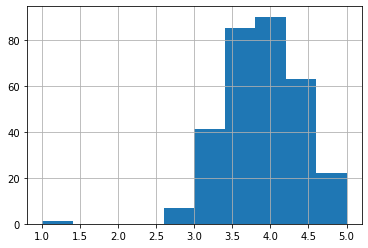

In [58]:
df[df["Rating"] > 0]["Rating"].hist()

In [60]:
df["Avg Salary"].describe()

count    497.000000
mean     150.694165
std       45.638504
min       52.500000
25%      108.000000
50%      180.000000
75%      180.000000
max      180.000000
Name: Avg Salary, dtype: float64

<AxesSubplot:>

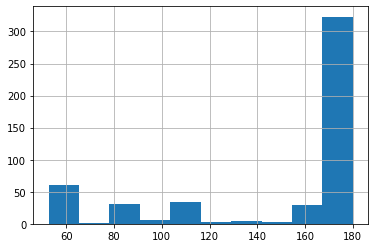

In [61]:
df["Avg Salary"].hist()

<AxesSubplot:>

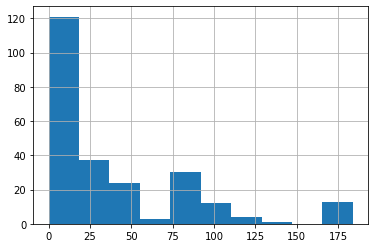

In [73]:
df[df["Age of Company"] != "Unknown"]["Age of Company"].astype("int64").hist()

<AxesSubplot:>

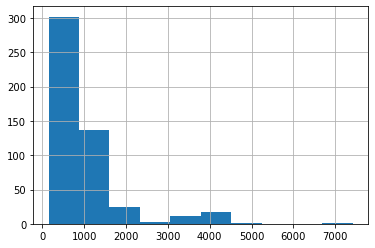

In [74]:
df['Desc. Length'].hist()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job Title               497 non-null    object 
 1   Salary Estimate         497 non-null    object 
 2   Job Description         497 non-null    object 
 3   Rating                  497 non-null    float64
 4   Company Name            497 non-null    object 
 5   Location                497 non-null    object 
 6   Size                    497 non-null    object 
 7   Founded                 497 non-null    int64  
 8   Type of ownership       497 non-null    object 
 9   Industry                497 non-null    object 
 10  Sector                  497 non-null    object 
 11  Revenue                 497 non-null    object 
 12  Hourly                  497 non-null    int64  
 13  Have Employer Provided  497 non-null    int64  
 14  Min Salary              497 non-null    in

<AxesSubplot:>

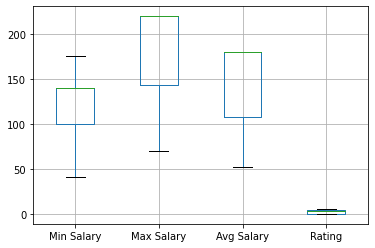

In [82]:
df.boxplot(column = ["Min Salary","Max Salary","Avg Salary", "Rating"])

In [84]:
df[["Min Salary","Max Salary","Avg Salary", "Rating"]].corr()

,Min Salary,Max Salary,Avg Salary,Rating
Min Salary,1.000000,0.848883,0.869528,-0.008182
Max Salary,0.848883,1.000000,0.969773,0.008376
Avg Salary,0.869528,0.969773,1.000000,-0.000014
Rating,-0.008182,0.008376,-0.000014,1.000000


<AxesSubplot:>

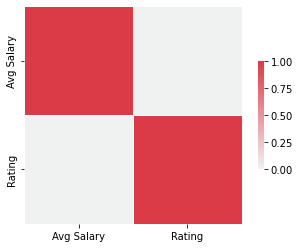

In [90]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[["Avg Salary", "Rating"]].corr(),
           center = 0, cmap = cmap, square = True, linewidths = 0.5,
           cbar_kws = {"shrink":0.5})

In [94]:
df_cat = df[['Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Have Employer Provided',
       'State','Age of Company', 'python_ind', 'excel_ind', 'rstudio_ind', 'aws_ind',
       'spark_ind', 'sql_ind', 'Requirements', 'Job Simp.', 'Seniority']]

Graph for Location: total = 76


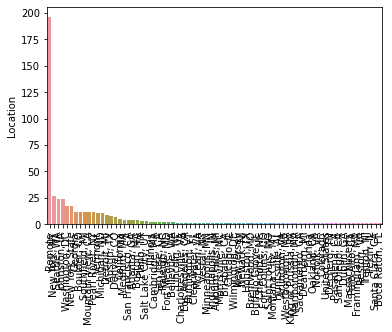

Graph for Size: total = 8


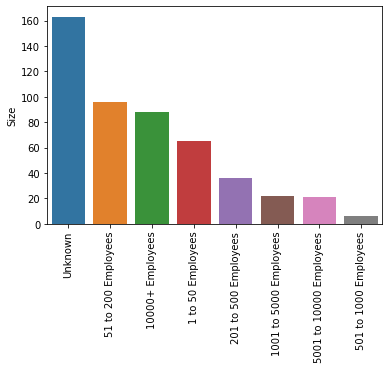

Graph for Founded: total = 52


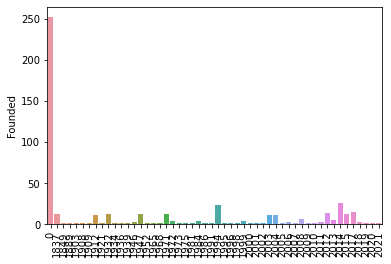

Graph for Type of ownership: total = 9


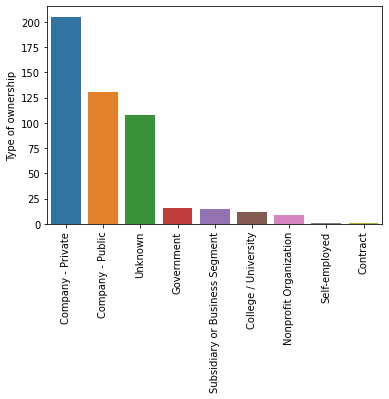

Graph for Industry: total = 42


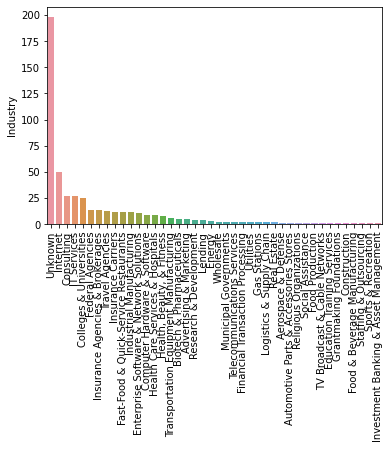

Graph for Sector: total = 24


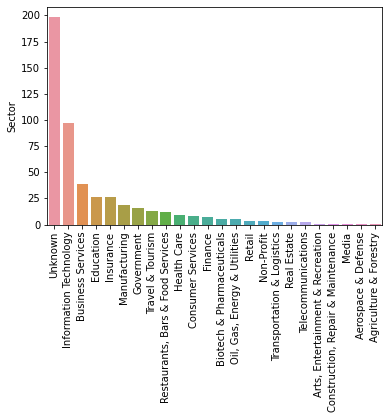

Graph for Revenue: total = 13


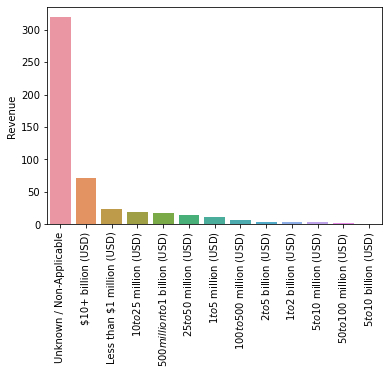

Graph for Hourly: total = 2


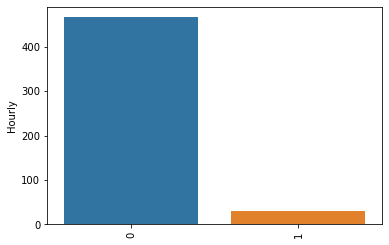

Graph for Have Employer Provided: total = 2


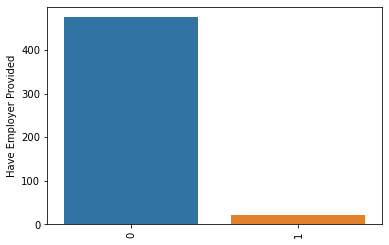

Graph for Company: total = 178


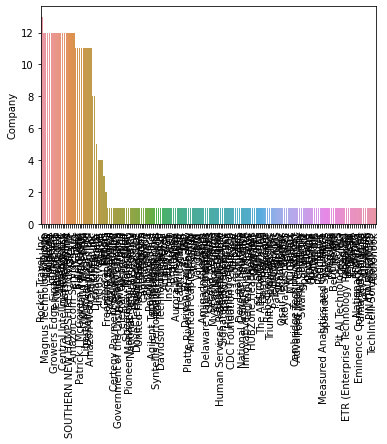

Graph for State: total = 30


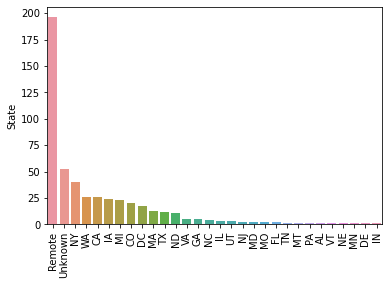

Graph for Age of Company: total = 52


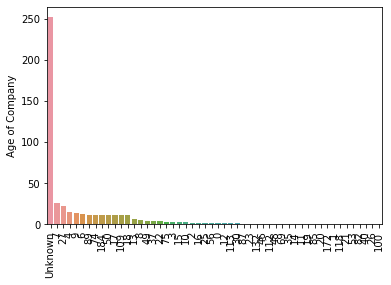

Graph for python_ind: total = 2


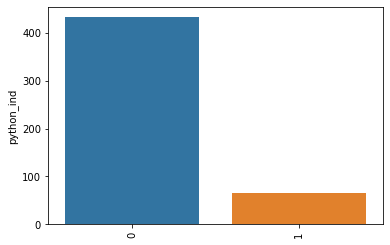

Graph for excel_ind: total = 2


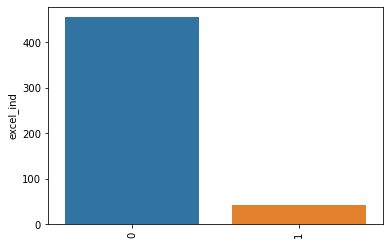

Graph for rstudio_ind: total = 1


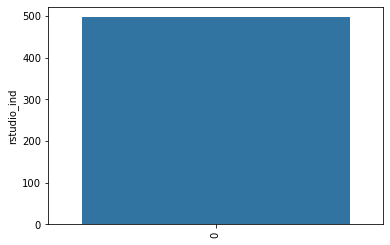

Graph for aws_ind: total = 2


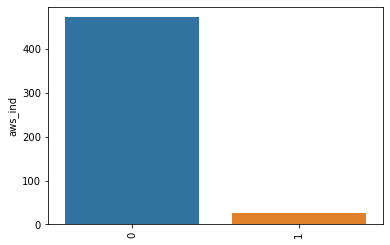

Graph for spark_ind: total = 2


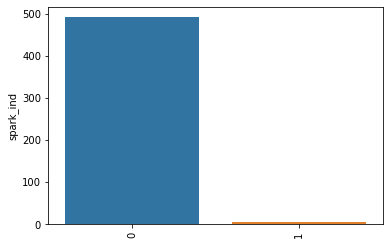

Graph for sql_ind: total = 2


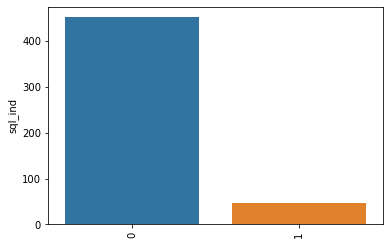

Graph for Requirements: total = 17


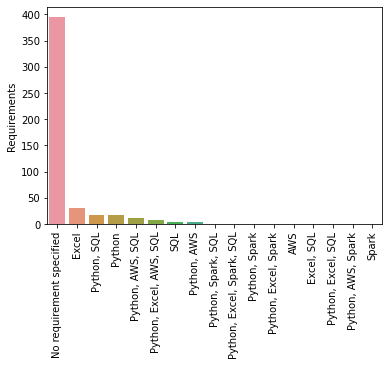

Graph for Job Simp.: total = 2


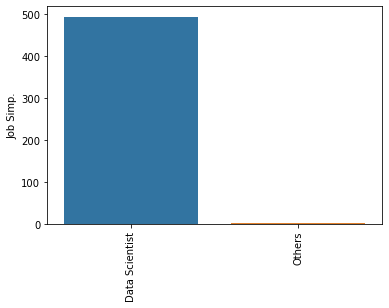

Graph for Seniority: total = 3


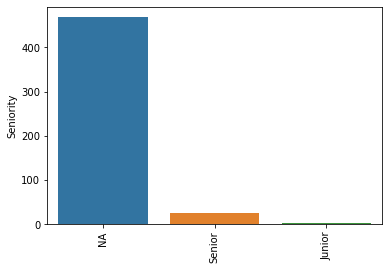

In [99]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for {i}: total = {n}".format(i = i, n = len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [100]:
df["python_ind"].sum()

65

In [114]:
req = pd.DataFrame({"skill": ["Python","Excel","RStudio","AWS","SQL","Spark"],
                   "count": [df["python_ind"].sum(), df["excel_ind"].sum(),
                             df["rstudio_ind"].sum(), df["aws_ind"].sum(),
                             df["sql_ind"].sum(), df["spark_ind"].sum()]})
req = req.set_index("skill")
print(req)
print(req.info())

         count
skill         
Python      65
Excel       42
RStudio      0
AWS         25
SQL         46
Spark        6
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Python to Spark
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   6 non-null      int64
dtypes: int64(1)
memory usage: 96.0+ bytes
None


Text(0, 0.5, '')

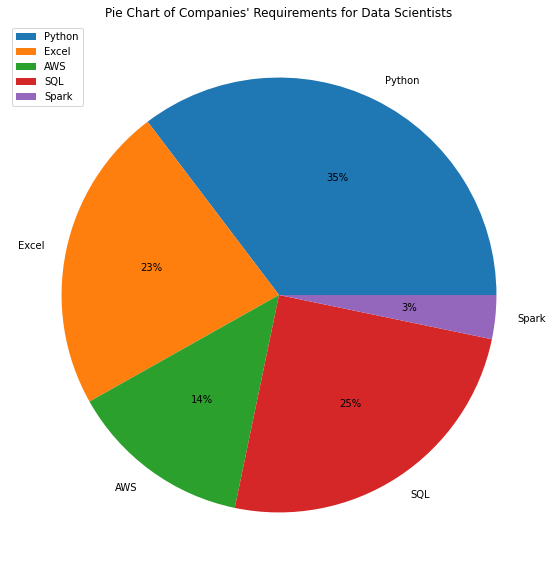

In [127]:
colors = sns.color_palette('pastel')[0:len(req)]

req[req["count"] > 0].plot.pie(y='count', figsize=(10, 10), autopct='%1.0f%%')
plt.title("Pie Chart of Companies' Requirements for Data Scientists")
plt.ylabel("")

In [128]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly', 'Have Employer Provided',
       'Min Salary', 'Max Salary', 'Avg Salary', 'Company', 'State',
       'Age of Company', 'python_ind', 'excel_ind', 'rstudio_ind', 'aws_ind',
       'spark_ind', 'sql_ind', 'Requirements', 'Job Simp.', 'Seniority',
       'Desc. Length'],
      dtype='object')

In [131]:
pd.pivot_table(df, index = ["Job Simp.","Seniority"], values = "Avg Salary")

Avg Salary
Job Simp.      Seniority            
Data Scientist Junior      69.333333
               NA         152.741416
               Senior     127.300000
Others         NA         109.000000

In [134]:
pd.pivot_table(df, index = "State", values = "Avg Salary").sort_values("Avg Salary", ascending = False)

,Avg Salary
State,
IA,173.375000
ND,172.272727
WA,167.519231
MI,166.913043
Remote,161.193878
MD,159.000000
VT,159.000000
NE,159.000000
MN,159.000000


In [137]:
#avg salary by industry
pd.pivot_table(df, index = "Industry", values = "Avg Salary").sort_values("Avg Salary", ascending = False)

,Avg Salary
Industry,
Fast-Food & Quick-Service Restaurants,175.375000
Industrial Manufacturing,173.416667
Colleges & Universities,172.900000
Internet,168.170000
Federal Agencies,167.750000
Insurance Carriers,166.958333
Travel Agencies,164.807692
"Health, Beauty, & Fitness",164.062500
Consulting,161.814815


In [138]:
#avg salary by sector
pd.pivot_table(df, index = "Sector", values = "Avg Salary").sort_values("Avg Salary", ascending = False)

,Avg Salary
Sector,
"Restaurants, Bars & Food Services",175.375000
Education,168.269231
Travel & Tourism,164.807692
Consumer Services,164.062500
Insurance,163.519231
Government,160.468750
Agriculture & Forestry,159.000000
Aerospace & Defense,159.000000
Unknown,154.247475


In [141]:
df_pivots = df[["Rating","Industry","Sector","Revenue","Hourly",'Have Employer Provided','python_ind', 'excel_ind', 'rstudio_ind', 'aws_ind',
       'spark_ind', 'sql_ind', 'Type of ownership']]

In [142]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df, index = i, values = "Avg Salary").sort_values("Avg Salary", ascending = False))

Rating
        Avg Salary
Rating            
3.0     170.208333
3.8     169.194444
4.0     164.011628
3.7     163.803571
4.5     159.068182
4.1     157.767857
3.5     154.600000
0.0     150.393617
5.0     141.205882
3.9     140.815789
3.2     134.357143
3.4     133.500000
3.1     125.666667
2.9     123.500000
4.4     121.500000
2.8     109.000000
2.6     108.000000
4.8     108.000000
1.0     108.000000
4.7     108.000000
3.3     105.750000
4.3      98.888889
4.2      90.500000
3.6      88.750000
4.9      88.000000
4.6      60.000000
Industry
                                         Avg Salary
Industry                                           
Fast-Food & Quick-Service Restaurants    175.375000
Industrial Manufacturing                 173.416667
Colleges & Universities                  172.900000
Internet                                 168.170000
Federal Agencies                         167.750000
Insurance Carriers                       166.958333
Travel Agencies                     

In [143]:
pd.pivot_table(df, index = "Revenue", columns = "python_ind", values = "Avg Salary", aggfunc = "count")

python_ind,0,1
Revenue,,
$1 to $2 billion (USD),2.0,1.0
$1 to $5 million (USD),10.0,2.0
$10 to $25 million (USD),18.0,1.0
$10+ billion (USD),51.0,21.0
$100 to $500 million (USD),6.0,1.0
$2 to $5 billion (USD),3.0,NaN
$25 to $50 million (USD),15.0,NaN
$5 to $10 billion (USD),NaN,1.0
$5 to $10 million (USD),2.0,1.0


In [149]:
#create word cloud from job description
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [150]:
words = " ".join(df["Job Description"])

In [151]:
def punctuation_stop(text):
    #remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

In [156]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [161]:
words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

In [165]:
wc = WordCloud(background_color = "white", random_state = 1, stopwords = STOPWORDS,
              max_words = 2000, width = 8000, height = 1500)
wc.generate(text)

ImportError: The _imagingft C module is not installed

ValueError: WordCloud has not been calculated, call generate first.

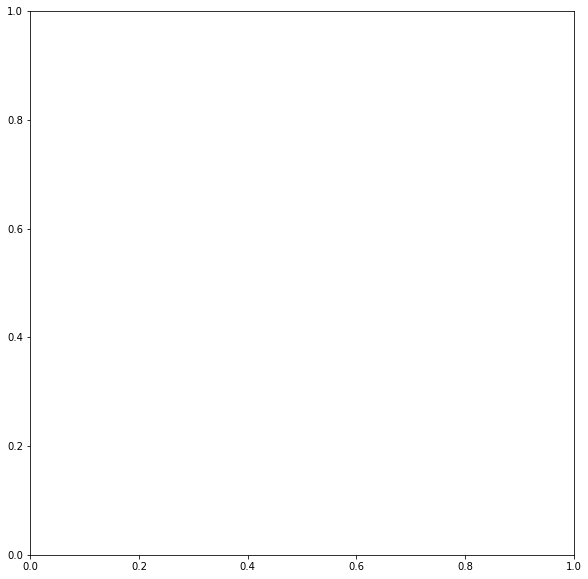

In [164]:
plt.figure(figsize = [10, 10])
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()